# [分類問題の初歩](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)

スニーカーやシャツなど、身に着けるものの写真を分類するニューラルネットワークのモデルを訓練

In [1]:
import tensorflow as tf
from tensorflow import keras

import os

os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
print(tf.__version__)

2.0.0


# データの読み込み

Fashion MNISTを使用。10カテゴリーの白黒画像70,000枚

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Label\tName")
for i, name in enumerate(class_names):
    print("{0}\t{1}".format(i, name))

Label	Name
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

各ピクセルの値は0から255

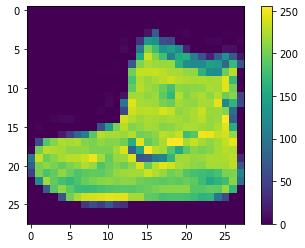

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

学習を始める前に、各ピクセルの値を0から1までの範囲に変換

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

変換後のイメージ

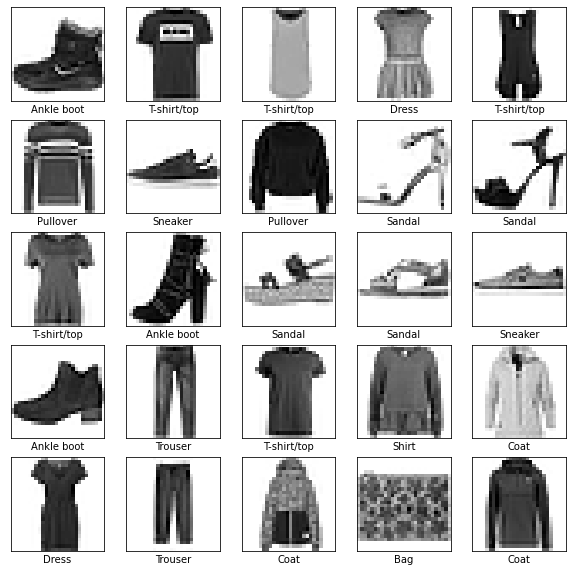

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# モデルの構築

層の設定

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- 層１`tf.keras.layers.Flatten`：この層は、画像を（$28\times28$ピクセルの）2次元配列から、$28\times28=784$ピクセルの、1次元配列に変換。この層が、画像の中に積まれているピクセルの行を取り崩し、横に並べると考えてください。この層には学習すべきパラメータはなく、ただデータのフォーマット変換を行うだけです。
- 層２`tf.keras.layers.Dense`：この層は、密結合あるいは全結合されたニューロンの層となります。128個のノード（あるはニューロン）があります。
- 層３`tf.keras.layers.Dense`：最後の層でもある2番めの層は、10ノードのsoftmax層です。この層は、合計が1になる10個の確率の配列を返します。それぞれのノードは、今見ている画像が10個のクラスのひとつひとつに属する確率を出力します。

モデルのコンパイル

- 損失関数（loss function）：訓練中にモデルがどれくらい正確かを測定します。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。
- オプティマイザ（optimizer）：モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定します。
- メトリクス（metrics）：訓練とテストのステップを監視するのに使用します。下記の例ではaccuracy （正解率）、つまり、画像が正しく分類された比率を使用しています。

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

モデルの訓練

1. モデルに訓練用データを投入
2. 学習（`model.fit`）
3. モデルにテスト用データの予測をやらせる

In [16]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4932 - accuracy: 0.8263
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3757 - accuracy: 0.8654
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3363 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3136 - accuracy: 0.8842
Epoch 5/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2954 - accuracy: 0.8906


モデルの評価

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2765 - accuracy: 0.8756

Test accuracy: 0.8756


実際にモデルを使って予測をする

In [18]:
predictions = model.predict(test_images)

[4.19950702e-05 3.89881620e-07 2.50832318e-06 3.10827863e-06
 1.22588726e-05 1.69189051e-02 1.44284568e-05 8.36837739e-02
 1.14230235e-04 8.99208426e-01]
the most probable class: Ankle boot (9)
the correct class: Ankle boot (9)


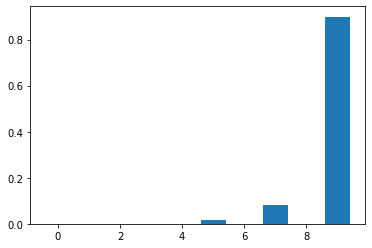

In [19]:
print(predictions[0])
print("the most probable class: {0} ({1})".format(class_names[np.argmax(predictions[0])], np.argmax(predictions[0])))
print("the correct class: {0} ({1})".format(class_names[test_labels[0]], test_labels[0]))
plt.bar(np.arange(10), predictions[0])
plt.show()

10チャンネルを全てグラフ化

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

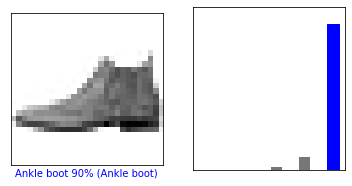

In [21]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions, test_labels)
plt.show()

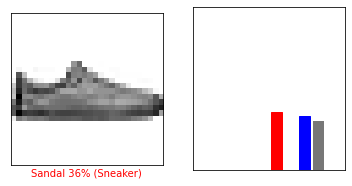

In [22]:
index = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions, test_labels)
plt.show()

X個のテスト画像、予測されたラベル、正解ラベルを表示します。
正しい予測は青で、間違った予測は赤で表示しています。
画像のキャプションは``{予測クラス} {確率} ({正解クラス})``を表示します。

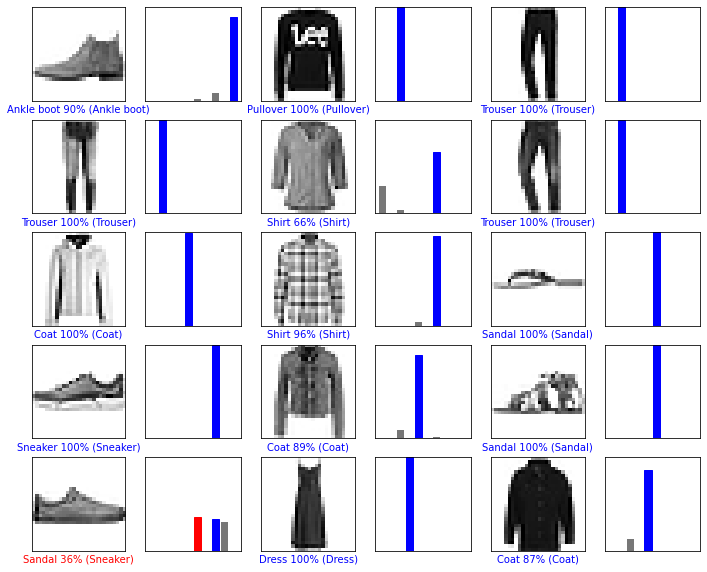

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

1枚の画像に対する予測

In [24]:
index = random.randint(0, 10000 - 1)
img = test_images[index]
print(img.shape)

(28, 28)


`tf.keras`のモデルはサンプル中のバッチ（batch: 集合）について予測を行うように作られている。そのため、１枚の画像でもリスト化する。

In [25]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


予測開始

In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.7578244e-06 1.6443265e-10 3.1709533e-08 6.5648704e-09 1.1128248e-08
  9.9923229e-01 1.1746965e-07 1.5983233e-05 7.4685283e-04 3.0234050e-06]]


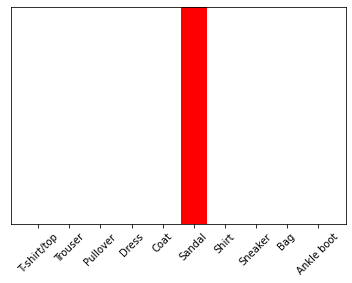

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

5